In [1]:
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2
from skimage import color
from skimage import io
from skimage.filters import gaussian
from scipy.ndimage import binary_fill_holes

In [2]:
animal = 'MD175'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'C1', 'thumbnail_cleaned')
roughs = ['000.tif', '002.tif', '003.tif', '162.tif']
file = '162.tif'
infile = os.path.join(INPUT, file)

In [3]:
img = io.imread(infile)
print('img',img.dtype, img.shape)
new_img = color.rgb2gray(img)
new_img *= 255 # or any coefficient
new_img = new_img.astype(np.uint8)
new_img[(new_img > 200)] = 0

img uint8 (515, 671, 3)


In [15]:
lowerbound = 0
upperbound = 255
#all pixels value above lowerbound will  be set to upperbound 
_, thresh = cv2.threshold(new_img.copy(), lowerbound, upperbound, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
thresh = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
#smoothed = gaussian(thresh, 50)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))
smoothed = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, kernel)
inverted_thresh = cv2.bitwise_not(smoothed)
filled_thresh = binary_fill_holes(inverted_thresh).astype(np.uint8)
cleaned = cv2.bitwise_and(img,img, mask=filled_thresh)

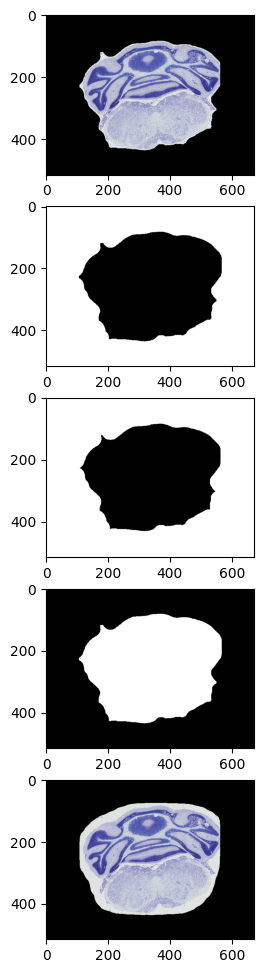

In [16]:
images = [cleaned, smoothed, thresh, filled_thresh, img]
_, axs = plt.subplots(len(images),1, figsize=(12, 12))
axs = axs.flatten()
for image, ax in zip(images, axs):
    ax.imshow(image, cmap="gray")
plt.show()